*italicized text*# Assignment 1
**Due date** October 24th, 2024.

Liam McGoldrick, mcgoldrl@mcmaster.ca, 400325148 Charlie Flinn, flinnc@mcmaster.ca, 400481360
<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# run this line to install Rdkit library
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 21.0 MB/s eta 0:00:00


In [ ]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# import this additional libraries
import pandas as pd
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles, MolToSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

# Question 1
The van der Waals equation of state is given by,
$$
P(V,T) = \frac{RT}{V-b} - \frac{a}{V^2}
$$
where $P(V,T)$ is the pressure, $R$ is the ideal gas constant, $T$ is the temperature, $V$ is the molar volume, and $a$ and $b$ are constants.
The value of $a$ and $b$ are,
* a = 1.38169 $\frac{bar\; L^2}{mol}$
* b = 0.0387 $\frac{L}{mol}$
*
The van der Waals equation of state is normally only used to model the gas.

## Q1.a [5 marks]
Plot $P$ vs $V$ with for an isotherm ($T=77.25K$).
For the plot to look ``nice'' the grid must have the following properties,
1. lowest and maximum values of $V$ are, $V_{min} = 0.045 \frac{L}{mol}$, and $V_{max} = 1 \frac{L}{mol}$.
2. the total grid must have 10,000 points
   
Create a function that computes $P$ using the van der Waals equation of state. <br>


In [ ]:
# code for the grid

v_min = 0.045  # L/mol
v_max = 1  # L/mol
delta_v = 1E-5
n_points = 10000

v_grid = np.linspace(v_min, v_max,n_points)

In [ ]:
# code for P state function
def P_vanW(V,T):
    R = 8.31446261815324 # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387 # L/mol
    p = (R*T)/(V-b) - a/(V**2)

    return p

Text(0.5, 40000, 'T=77.25K')

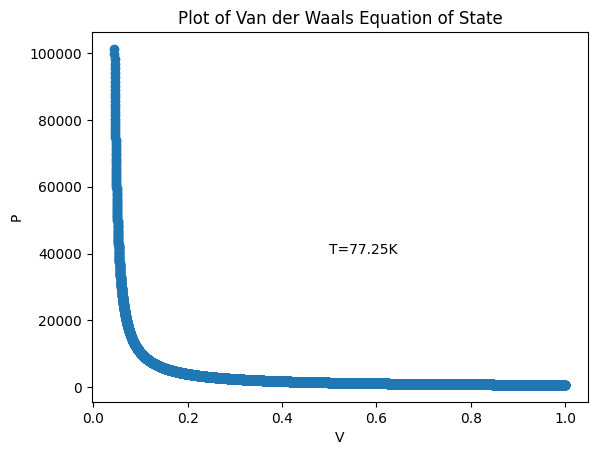

In [ ]:
# code for plotting P state function
# The x-axis and y-axis must specify the name of the variables you are plotting. (marks will be deduced if you do not specify what variable is each axis)

T = 77.25
p = P_vanW(v_grid,T)
plt.scatter(v_grid, p)
plt.xlabel('V')
plt.ylabel('P')
plt.title("Plot of Van der Waals Equation of State")
plt.text(0.5,40000,"T=77.25K")

## Q1.b [10 marks]

From the fundamental equation of thermodynamics we can define the following equality,
$$
\int_{P_1}^{P_2} V(P)\;dP = \int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV
$$

As you can see from this integral it is also necessary the computation of partial derivative of the state function P.


Compute the partial derivative of $P(V,T)$ with respect to $V$ at $T=77.25K$ using the following numerical approximation for the derivative. <br>
**Three-point forward difference formula:**
$$
\frac{\partial f}{\partial x} \approx \frac{-3 f(x) + 4f(x+h) - f(x+2h)}{2h}
$$
where $f(x)$ is the function you want to differentiate, $x$ is the variable, and $h$ is the step size.

1. Create a python function that computes the derivative of P with respect to V using the three-point forward difference.
2. Cerate a python function that computes the analytical derivative of P with respect to V.
3. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods.
Compare your results with the analytical solution (extra exercise for your midterm).

Verify the output of any of both functions is the same size as the grid of the input.

In [ ]:
def three_point_differentiation(x,h):
    # code goes here
    derivative = (-3 * P_vanW(x,77.25)) + (4 * P_vanW(x+h,77.25)) - (P_vanW(x+2*h,77.25)) / (2 * h)
    return derivative

In [ ]:
# partial derivative of P with respect to V at constant T
def dP_dV(V,T):
    # code goes here
    T = 77.25
    R = 8.31446261815324
    a = 1.38169
    b = 0.0387
    analytical_derivative = (-R*T)/(V-b)**2 + a/(V**3)

    return analytical_derivative

print(dP_dV(v_grid,77.25))

[-1.61675594e+07 -1.56879241e+07 -1.52293082e+07 ... -6.93941810e+02
 -6.93804032e+02 -6.93666295e+02]


In [ ]:
# value the Frobenius norm of the difference of the derivative compute with three-point forward difference and the analytical derivative.
h= 1e-5
three_point_derivative = three_point_differentiation(v_grid,h)
analytical_derivative = dP_dV(v_grid,77.25)
diff = three_point_derivative - analytical_derivative
frobenius_norm = np.linalg.norm(diff)
print("Frobenius Norm:", frobenius_norm)

# code here

Frobenius Norm: 40873334320.80934


## Q1.c numerical integration [10marks]

In class we saw that the integral of a function can be approximated using the sum of the integrand.<br>
**Composite Three-Point Trapezoidal Rule:**
For a uniform grid where $h$ is the spacing between consecutive points, the composite three-point trapezoidal rule can be written as,
$$
\int_{a}^{b} f(x) dx = \frac{h}{4} \sum_{i=0}^{N-3} \left (f(x_i) + 2f(x_{i+1}) + f(x_{i+2}) \right )
$$
where $N$ is the number of grid points.

1. Create a python function for the three-point trapezoidal rule for numerical integration.
2. Cerate a python function that computes the analytical integration of $\int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV$ for different values of $V_1$ and $V_2$ and T.
3. Compare your three-point trapezoidal rule function for this example with the analytical number.
4. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods.
Compare your results with the analytical solution (extra exercise for your midterm).

In [62]:
def three_point_trapezoidal_rule(f,h):
    # code here
    integral = (h / 4) * np.sum(f[:-2] + 2 * f[1:-1] + f[2:])
    return integral

h = delta_v
dP_dV_values = three_point_differentiation(v_grid, h)
integrand_values = v_grid * dP_dV_values
numerical_integral = three_point_trapezoidal_rule(integrand_values, h)
print("Numerical Integral:", numerical_integral)

Numerical Integral: -3840508.2559585273


In [ ]:
# function that computes the analytical integral of int V (dP/dV)_T
V_min = 0.045
V_max = 1.0
T = 77.25
def analytical_integral(V_min,V_max,T):

    # code here
    R = 8.31446261815324
    a = 1.38169
    b = 0.0387

    # Analytical expression for the integral:
    integral = R * T * np.log((V_max - b) / (V_min - b)) - a * (1 / V_max - 1 / V_min)
    return integral



analytical_result = analytical_integral(V_min, V_max, T)
print("Analytical Integral:", analytical_result)

Analytical Integral: 3258.5989151147346


In [ ]:
Compare your three-point trapezoidal rule function for this example with the analytical number.
Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods. Compare your results with the analytical solution (extra exercise for your midterm)

## Question 2

## Q2 Tanimoto similarity function [10marks]

Later in class we will see that a molecule can be represented numerically using a **finger prints** representation. This numerical vector is used describe each individual molecule,
for example for the molecule of caffeine,


Now, suppose you have a database of 5,000 molecules.<br>
To find the similarity of the caffeine molecule with the database. <br>
You would calculate the **Tanimoto similarity** between each molecule in the database and the caffeine molecule.<br>


**Tanimoto similarity**
$$
TS(\mathbf{x}, \mathbf{x}') = \frac{\mathbf{x}^\top\mathbf{x}'}{\|\mathbf{x}\|^2 + \|\mathbf{x}'\|^2 - \mathbf{x}^\top\mathbf{x}'},
$$
where
* $\mathbf{x}$ is the fingerprint representation of a molecule
* $\mathbf{x}^\top\mathbf{x}'$ is the dot product between two molecules' fingerprint representation
* $\|\mathbf{x}\|^2$ is the square norm of the fingerprint representation; $\|\mathbf{x}\|^2 = \sum_i^n x_i^2$

1. Two structures are usually considered similar if $TS > 0.5$.
From the database, how many molecules are similar to the caffeine molecule?
1. Plot a histogram of the Tanimoto similarity between each molecule in the database and the caffeine molecule. The histogram must have 200 bins.
2. What is the less similar molecule to caffeine.
3. What is the average Tanimoto similarity between each molecule in the database and caffeine?

In [ ]:
# code to get the fingerprint representation for each molecule
def get_fingerprints(m_smiles, radius=2, nbits=2048):
  m = AllChem.MolFromSmiles(m_smiles)
  m = AllChem.AddHs(m)
  m_fingerprints = AllChem.GetMorganFingerprintAsBitVect(
      m, radius=radius, nBits=nbits)
  return np.asarray(m_fingerprints)

In [ ]:
#math functions to call for Tanimoto similarity function

#returns the dot product of two matrices
def dotProduct(u,v):
  newu = u.shape[0]
  newv = v.shape[0]

  if newu == newv:
    product = 0
    for i in range(newu):
      product += u[i]*v[i]
    return product
  else:
    raise TypeError("These vectors are different sizes")

#returns the square norm of one matrix
def squareNorm(x):
  newx = x.shape[0]
  norm = 0
  for i in range(newx):
    norm += x[i]*x[i]
  return norm

In [ ]:
# Tanimoto similarity
def tanimoto_similarity(fp_molecule1, fp_molecule2):

    x = fp_molecule1
    xp = fp_molecule2

    similarity = dotProduct(x,xp)/(squareNorm(x)+squareNorm(xp)-dotProduct(x,xp))
    # code here

    return similarity

[0 0 0 ... 0 0 0]


[03:33:04] DEPRECATION WARNING: please use MorganGenerator


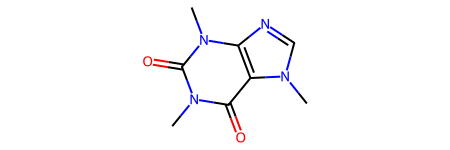

In [ ]:
# caffeine molecule
smiles_caff = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
# get the fingerprint representation of caffeine molecule
x_caff = get_fingerprints(smiles_caff)
print(x_caff)


# template for plotting the molecule
m = AllChem.MolFromSmiles(smiles_caff)
m

[03:33:06] DEPRECATION WARNING: please use MorganGenerator


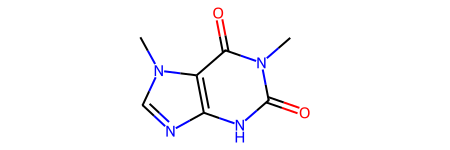

In [ ]:
# Paraxanthine
parax_sm = 'O=C2Nc1ncn(c1C(=O)N2C)C'
m1 = MolFromSmiles(parax_sm)
x_parax_fp = get_fingerprints(parax_sm)
m1

In [ ]:
# similarity between Paraxanthine and Caffeine
similarity = tanimoto_similarity(x_caff, x_parax_fp)
print('Similarity = ', similarity)

Similarity =  0.5365853658536586


In [ ]:
#load the database
data_file = 'https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Assigments/solubility.csv'
data = pd.read_csv(data_file)
data = data['SMILES']
print('Total data points: ',len(data))

Total data points:  9982


In [ ]:
# note you will get an error that says DEPRECATION WARNING: please use MorganGenerator, do not worry!

similarities = np.zeros(len(data)) # vector to store the similarities
for i, si in enumerate(data):
    # get the fingerprint representation of each molecule in the database
    fp = get_fingerprints(si)

    # calculate the Tanimoto similarity between the caffeine molecule and each molecule in the database
    similarity = tanimoto_similarity(x_caff, fp)

    # add the similarity to a list
    similarities[i] = similarity

[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerator
[03:33:11] DEPRECATION WARNING: please use MorganGenerat

KeyboardInterrupt: 

In [ ]:
# plot the histogram of the Tanimoto similarity here
# make the necessary adjustments to make the plot prettier
#have stuck this below minmax cell
plt.hist(similarities, bins= 200, facecolor='indigo', alpha = 0.75)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("Number of Molecules")
plt.title("Tanimoto Similarity of Molecules as Compared to Caffeine")
plt.grid(True)

In [ ]:
# average of the similarity
total = 0
numSimilar = 0
for i in range (similarities.shape[0]):
    total += similarities[i]
    #if the molecule is similar, adds to the tally of similar molecules.
    if similarities[i] > 0.5:
        numSimilar +=1
average = total/similarities.shape[0]

print("number of similar molecules:",numSimilar,", overall average similarity:", average)

# maximum and minimum value of the TS. You can get the molecule in the database using
# np.argsort(similarities) Check the Numpy documentation.
minTs = similarities[np.argsort(similarities)[0]]
maxTs = similarities[np.argsort(similarities)[-1]]

print("maximum TS:", maxTs,", minimum TS:", minTs)

s0 = data.iloc[np.argsort(similarities)[0]]
print("least similar molecule:", s0)
m0 = AllChem.MolFromSmiles(s0)
m0

### Extra code for plotting molecules
This code can help you plot each molecule in the database

In [ ]:
# The database's first molecule is

s0 = data.iloc[0]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0



NameError: name 'data' is not defined

CN(C)c1ccc(C=O)cc1


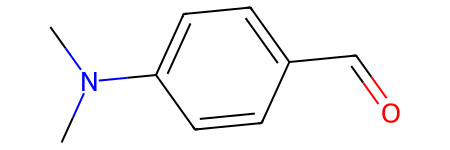

In [ ]:
# the 10th molecule is,
s0 = data.iloc[10]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0